# Intro
I am going to try to write a code that has been written in MATLAB already in python

## Reference problem & MATLAB code
### Problem
-  Textbook: Engineering Dynamcis A Comprehensive Introduction (N. Jeremy Kasdin and Derek A. Paley)
    - Tutorial 3.2 Pp. 95
    - a particle sliding on a parabola
    - Equations:
$$ 
\dot{z_1}= z_2
$$ 
$$ 
\dot{z_2} = -\frac{2 \mu z_1(g+2\mu z_2^2) }{1+4\mu^2z_1^2}
$$

where $z_1 = x$, position of the particle and $z_2 = \dot{x} $, speed of the particle.

### MATLAB Code
- MYODEFUN

`function zdot = myodefun(t,z,g,mu)`\
`zdot(1,1) = z(2);`\
`zdot(2,1) = -2*mu*z(1)*(g+2*mu*z(2)^2)/(1+4*mu^2*z(1)^2);`

- call ode45

`[t,z] = ode45(@myodefun,[0 10], [1 0], [], g, mu);`


## Now, Let's try this on Python

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

- MYODEFUN equivalent:

In [8]:
def MYODEFUN(z,t,g,mu):
    dz1dt = z[1]
    dz2dt = -2 * mu * z[0] * (g + 2 * mu * z[1]**2)/(1+4*mu**2*z[0]**2)
    return [dz1dt,dz2dt]

In [70]:
z0 = [1, 0]
g = 9.81
mu = 1
t = np.linspace(0,10,1000)

In [72]:
solution = odeint(MYODEFUN,z0,t, args = (g,mu))

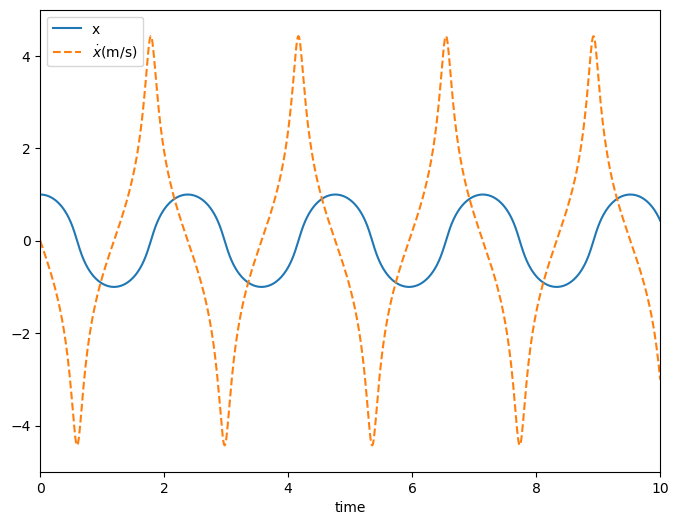

In [74]:
plt.figure(figsize=(8,6))
plt.plot(t, solution[:,0], label='x')
plt.plot(t, solution[:,1], label = r'${\dot{x}}$(m/s)', linestyle = '--')
plt.xlabel('time')
plt.axis([0,10,-5,5])
plt.legend()